In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [75]:
import yfinance as yf

start_date = '2010-01-01'
end_date = '2019-12-31'

df = yf.download('AAPL', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [76]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404013,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [77]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404013,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [78]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

In [79]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


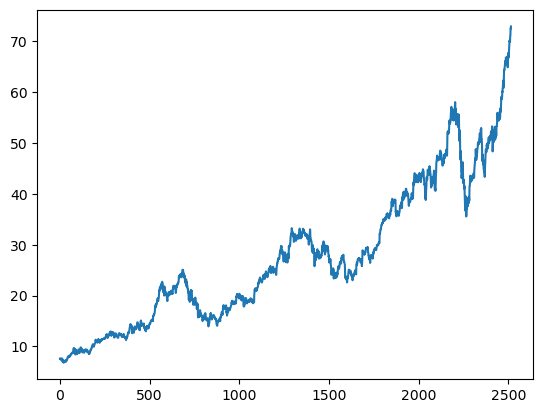

In [80]:
plt.plot(df.Close)

In [81]:
ma100 = df.Close.rolling(100).mean()
ma100

ma200 = df.Close.rolling(200).mean()

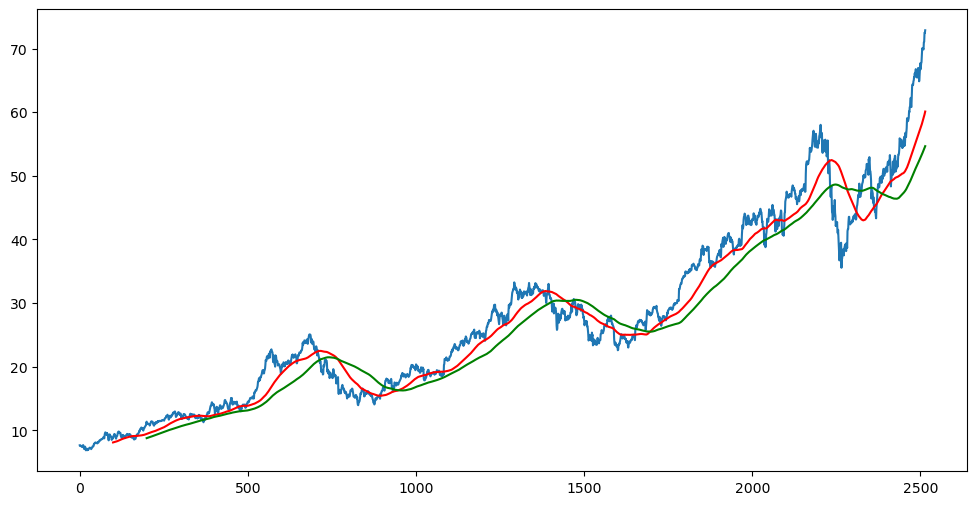

In [82]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [83]:
data_training = pd.DataFrame(df['Close'][0 : int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70) : int(len(df))])

In [84]:
print('Training',data_training.shape)
print('Testing',data_testing.shape)

Training (1760, 1)
Testing (755, 1)


In [85]:
scaler = MinMaxScaler(feature_range= (0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array = np.array(data_training_array)

In [86]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [87]:
data_training_array.shape

(1760, 1)

In [88]:
x_train = []
y_train = []

for i in range(100, len(data_training_array)):
    x_train.append(data_training_array[i-100:i, 0])
    y_train.append(data_training_array[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [89]:
x_train

array([[0.02971782, 0.03021854, 0.02560389, ..., 0.07403745, 0.07195343,
        0.07045129],
       [0.03021854, 0.02560389, 0.02507608, ..., 0.07195343, 0.07045129,
        0.08295551],
       [0.02560389, 0.02507608, 0.02697067, ..., 0.07045129, 0.08295551,
        0.08773258],
       ...,
       [0.74224237, 0.74300022, 0.7582516 , ..., 0.84795991, 0.84900194,
        0.84170783],
       [0.74300022, 0.7582516 , 0.76668248, ..., 0.84900194, 0.84170783,
        0.84388656],
       [0.7582516 , 0.76668248, 0.7708505 , ..., 0.84170783, 0.84388656,
        0.85089656]])

In [90]:
y_train

array([0.08295551, 0.08773258, 0.093078  , ..., 0.84388656, 0.85089656,
       0.84616011])

In [91]:
x_train.shape

(1660, 100)

In [92]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [114]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
52/52 [==============================] - 33s 428ms/step - loss: 0.0842
Epoch 2/50
52/52 [==============================] - 25s 473ms/step - loss: 0.0151
Epoch 3/50
52/52 [==============================] - 26s 490ms/step - loss: 0.0130
Epoch 4/50
52/52 [==============================] - 26s 495ms/step - loss: 0.0115
Epoch 5/50
52/52 [==============================] - 25s 484ms/step - loss: 0.0116
Epoch 6/50
52/52 [==============================] - 25s 488ms/step - loss: 0.0105
Epoch 7/50
52/52 [==============================] - 25s 477ms/step - loss: 0.0099
Epoch 8/50
52/52 [==============================] - 22s 430ms/step - loss: 0.0101
Epoch 9/50
52/52 [==============================] - 25s 477ms/step - loss: 0.0085
Epoch 10/50
52/52 [==============================] - 24s 470ms/step - loss: 0.0088
Epoch 11/50
52/52 [==============================] - 23s 444ms/step - loss: 0.0076
Epoch 12/50
52/52 [==============================] - 24s 454ms/step - loss: 0.0085
Epoch 13/50
5

In [116]:
past_100 = data_training.tail(100)
past_100

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [ ]:
final_test_df = past_100.append(data_testing, ignore_index= True)

In [119]:
final_test_df

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000
...,...
850,71.000000
851,71.067497
852,72.477501
853,72.449997


In [120]:
final = scaler.fit_transform(final_test_df)
final

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [121]:
final.shape

(855, 1)

In [122]:
x_test = []
y_test = []

for i in range(100, final.shape[0]):
    x_test.append(final[i-100 : i])
    y_test.append(final[i, 0])

x_test = np.array(x_test) 
y_test = np.array(y_test)  

In [123]:
print('X_test', x_test.shape)
print('y_test', y_test.shape)

X_test (755, 100, 1)
y_test (755,)


In [124]:
y_pred = model.predict(x_test)

24/24 [==============================] - 5s 117ms/step


In [125]:
y_pred.shape

(755, 1)

In [126]:
scaler.scale_

array([0.02123255])

In [127]:
#Scaling up
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

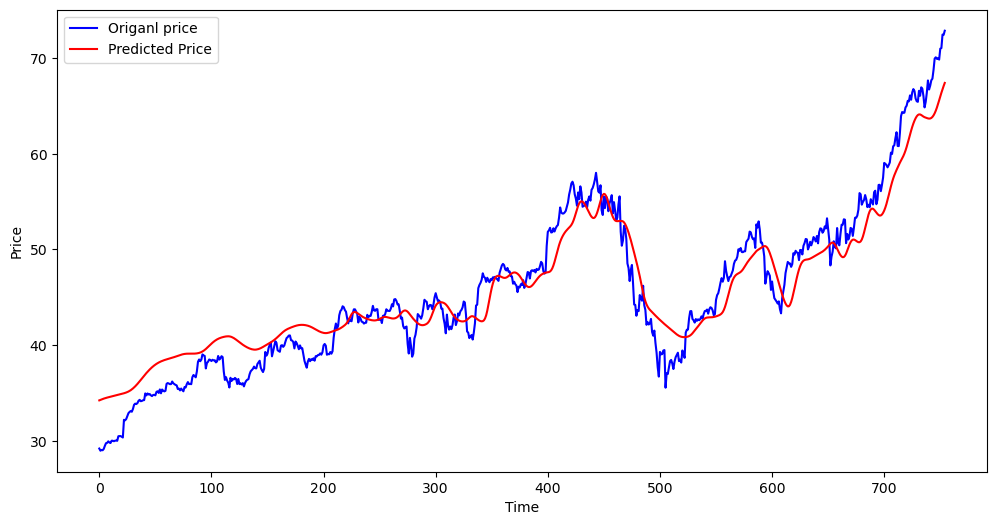

In [128]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Origanl price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()